# 6.1. Wrangling and exploration

## Contents
1. Import libraries and data set
2. Dropping columns, duplicates, missing values 
3. Checking data types  
4. Deriving new variables
5. Outliers
6. Exporting data 

### 1.	Import libraries and data set

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data set
c_org = pd.read_csv(r'C:\Users\irikh\iCloudDrive\Data analytics\COURSE DATA ANALYTIC\COURSE DATA IMMERG\A6\02 Data\Original Data\citibike.csv', index_col = False)

### 2. Dropping columns, duplicates, missing values

In [3]:
# Checking shape
c_org.shape

(50000, 18)

In [4]:
# Checking name of columns 
c_org.head ()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,NaN,0


In [5]:
# Dropping column as unnesesary for analysis
c_org = c_org.drop(columns = ['trip_id'])

In [6]:
# Checking 
c_org.columns

Index(['bike_id', 'weekday', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

In [7]:
# Dropping duplicates
c_org = c_org.drop_duplicates()

In [8]:
# Checking shape
c_org.shape

(50000, 17)

In [9]:
# Finding missing values
c_org.isnull().sum()

bike_id                       0
weekday                       0
start_hour                    0
start_time                    0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_time                      0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
subscriber                    0
birth_year                 6979
gender                        0
dtype: int64

In [10]:
# Dropping missing values
c_org.dropna(inplace = True)

In [11]:
c_org.shape

(43021, 17)

### 3. Checking data types

In [12]:
# Checking data type 
c_org.dtypes

bike_id                      int64
weekday                     object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                 float64
gender                       int64
dtype: object

In [13]:
# Changing data type
c_org['bike_id'] = c_org['bike_id'].astype('str')

In [14]:
# Changing data type
c_org['start_station_id'] = c_org['start_station_id'].astype('str')

In [15]:
# Changing data type
c_org['end_station_id'] = c_org['end_station_id'].astype('str')

In [20]:
# Checking result 
c_org.dtypes

bike_id                     object
weekday                     object
start_hour                   int64
start_time                  object
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                   int64
gender                       int64
dtype: object

In [17]:
# Convert the float column to an integer using astype()
c_org["birth_year"] = c_org["birth_year"].astype('int64')

In [18]:
# Checking column data type
c_org["birth_year"].dtype

dtype('int64')

In [19]:
# Checking mixed value
for col in c_org.columns.tolist():
  weird = (c_org[[col]].applymap(type) != c_org[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (c_org[weird]) > 0:
    print (col, ' mixed')
  else: print (col, ' consistent')

bike_id  consistent
weekday  consistent
start_hour  consistent
start_time  consistent
start_station_id  consistent
start_station_name  consistent
start_station_latitude  consistent
start_station_longitude  consistent
end_time  consistent
end_station_id  consistent
end_station_name  consistent
end_station_latitude  consistent
end_station_longitude  consistent
trip_duration  consistent
subscriber  consistent
birth_year  consistent
gender  consistent


### 4. Deriving new variables

In [21]:
# Create a function to convert trip duration to minutes
def time_convert(secs):
  days = secs//86400
  hours = (secs - days*86400)//3600
  mins = (secs - days*86400 - hours*3600)//60
  return mins

In [22]:
#Applying the function to the Trip Duration Column
c_org['trip_duration_min'] = c_org['trip_duration'].apply(time_convert)

In [23]:
# Check statistics 
c_org.describe()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,birth_year,gender,trip_duration_min
count,43021.000000,43021.000000,43021.000000,43021.000000,43021.000000,43021.00000,43021.000000,43021.000000,43021.000000
mean,14.084563,40.734477,-73.990952,40.734069,-73.991245,770.62337,1975.627786,1.247693,12.348179
std,4.932676,0.019598,0.012370,0.019602,0.012375,523.46211,11.089001,0.431785,8.711214
min,0.000000,40.680342,-74.017134,40.680342,-74.017134,60.00000,1899.000000,0.000000,1.000000
25%,10.000000,40.721101,-74.000040,40.720828,-74.000271,395.00000,1968.000000,1.000000,6.000000
50%,15.000000,40.736245,-73.990765,40.735877,-73.990985,621.00000,1978.000000,1.000000,10.000000
75%,18.000000,40.749718,-73.981948,40.749013,-73.982578,999.00000,1984.000000,1.000000,16.000000
max,23.000000,40.770513,-73.950048,40.770513,-73.950048,2697.00000,1997.000000,2.000000,44.000000


In [24]:
# Dropping column trip duration
c_org = c_org.drop(columns = ['trip_duration'])

In [25]:
# Checking results
c_org.columns

Index(['bike_id', 'weekday', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'subscriber', 'birth_year', 'gender', 'trip_duration_min'],
      dtype='object')

### 5. Outliers

<Axes: xlabel='birth_year', ylabel='birth_year'>

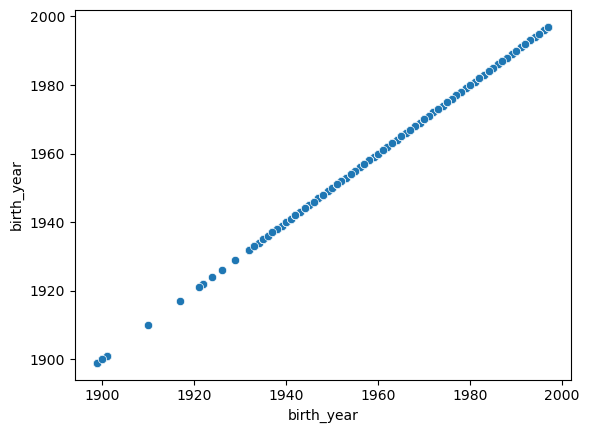

In [26]:
# Create scatterplot (to see outliers)
sns.scatterplot(x = 'birth_year', y = 'birth_year',data = c_org)

In [27]:
# Checking outliers   
c_org.loc[c_org['birth_year'] < 1930]

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,subscriber,birth_year,gender,trip_duration_min
306,15004,Fri,22,2013-09-06 22:27:51,473,Rivington St & Chrystie St,40.721101,-73.991925,2013-09-06 22:29:33,473,Rivington St & Chrystie St,40.721101,-73.991925,Subscriber,1922,1,1
563,19507,Mon,12,2013-09-23 12:43:58,305,E 58 St & 3 Ave,40.760958,-73.967245,2013-09-23 12:52:50,2006,Central Park S & 6 Ave,40.765909,-73.976342,Subscriber,1900,1,8
1371,16277,Thu,11,2013-09-05 11:20:55,500,Broadway & W 51 St,40.762288,-73.983362,2013-09-05 11:36:10,497,E 17 St & Broadway,40.737050,-73.990093,Subscriber,1900,1,15
1431,14638,Thu,7,2013-09-26 07:35:18,427,State St,40.702515,-74.014270,2013-09-26 08:00:02,212,W 16 St & The High Line,40.743349,-74.006818,Subscriber,1901,1,24
1754,17594,Wed,17,2013-09-25 17:00:04,476,E 31 St & 3 Ave,40.743943,-73.979661,2013-09-25 17:09:33,435,W 21 St & 6 Ave,40.741740,-73.994156,Subscriber,1900,1,9
3548,14835,Thu,17,2013-09-19 17:52:57,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-19 18:03:24,168,W 18 St & 6 Ave,40.739713,-73.994564,Subscriber,1922,1,10
4823,19804,Thu,7,2013-09-12 07:36:39,515,W 43 St & 10 Ave,40.760094,-73.994618,2013-09-12 07:55:02,268,Howard St & Centre St,40.719105,-73.999733,Subscriber,1899,1,18
7502,17490,Mon,7,2013-09-30 07:38:46,498,Broadway & W 32 St,40.748549,-73.988084,2013-09-30 08:01:17,340,Madison St & Clinton St,40.712690,-73.987763,Subscriber,1900,1,22
9644,15732,Sun,11,2013-09-08 11:11:35,515,W 43 St & 10 Ave,40.760094,-73.994618,2013-09-08 11:32:02,268,Howard St & Centre St,40.719105,-73.999733,Subscriber,1899,1,20
12926,14944,Fri,20,2013-09-20 20:16:18,427,State St,40.702515,-74.014270,2013-09-20 20:58:45,259,South St & Whitehall St,40.701221,-74.012342,Subscriber,1899,1,42


In [28]:
# Turn outliers to missing NaN
c_org.loc[c_org['birth_year'] < 1930, 'birth_year'] = np.nan

In [29]:
# Checking result of turning outliers
c_org['birth_year'].min()

1932.0

In [30]:
c_org.shape

(43021, 17)

### 6. Exporting data

In [31]:
path = r'C:\Users\irikh\iCloudDrive\Data analytics\COURSE DATA ANALYTIC\COURSE DATA IMMERG\A6'

In [32]:
c_org.to_csv(os.path.join(path, '02 Data','Prepared Data', 'c_wrangled.csv'))